In [33]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [34]:
from google.colab import files
uploaded = files.upload()
# Loading data
data = pd.read_excel('All_logs.xlsx')


Saving All_logs.xlsx to All_logs.xlsx


In [35]:
print(data.head())

       DEPTH  resistivity log  shear velocity  Gamma Ray  Neutron Porosity  \
0  2755.8492           0.2161        568.4455    72.5590          0.397710   
1  2756.0016           0.0906        580.7959    47.0249          0.180435   
2  2756.1540           0.0129        557.6414    23.1700          0.055951   
3  2756.3064           0.0012        561.3898    12.5571          0.043450   
4  2756.4588           0.0009        559.6324    10.5616          0.046385   

   Density log      PHIE  Water Saturation  VOLume ANHYDR  VOLume CALCITE  \
0       2.9078  0.000145            1.0000       0.000001        0.000001   
1       2.8989  0.000005            1.0000       0.272786        0.000001   
2       2.8260  0.026371            0.4695       0.313804        0.000001   
3       2.8148  0.037113            0.4140       0.250211        0.000001   
4       2.8095  0.049395            0.3233       0.402545        0.000001   

   VOLume DOLOM  VOLume Shale  
0      0.535466      0.464387  
1   

In [36]:

# features and target variable
X = data[['shear velocity', 'Gamma Ray', 'Neutron Porosity', 'Density log']]
y = data['resistivity log']


In [37]:
# Splitting data tO train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DecisionTree model
model = DecisionTreeRegressor()
# Train the model
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')

Mean Squared Error: 0.0066


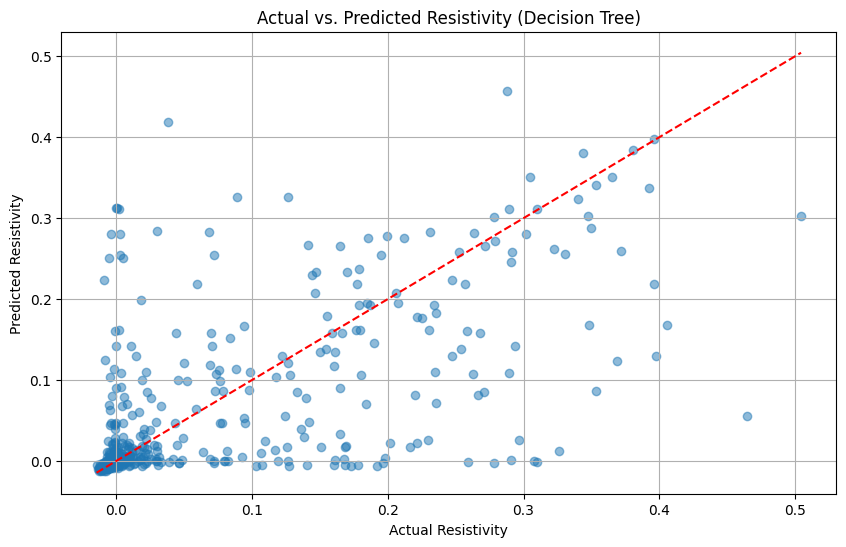

In [42]:

# comparison between real and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Decision Tree')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal')  # reference
plt.xlabel('Actual Resistivity')
plt.ylabel('Predicted Resistivity')
plt.title('Actual vs. Predicted Resistivity (Decision Tree)')
plt.grid()
plt.legend()
plt.show()

Mean Squared Error (Random Forest): 0.0044


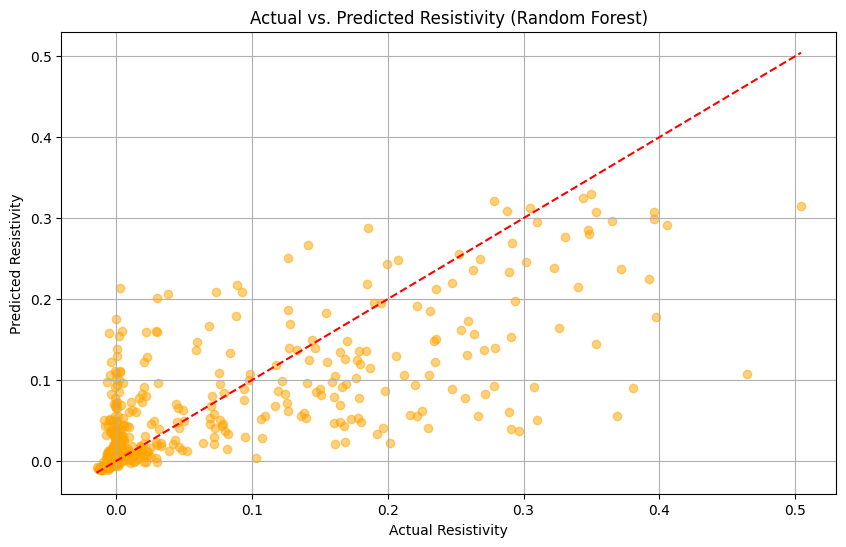

In [41]:
p# Random forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Prediction
rf_y_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
print(f'Mean Squared Error (Random Forest): {rf_mse:.4f}')

# Comparison vetveen  actual and predicted values for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_y_pred, alpha=0.5, color='orange', label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal')
plt.xlabel('Actual Resistivity')
plt.ylabel('Predicted Resistivity')
plt.title('Actual vs. Predicted Resistivity (Random Forest)')
plt.grid()
plt.legend()
plt.show()


Mean Squared Error (Linear Regression): 0.0069


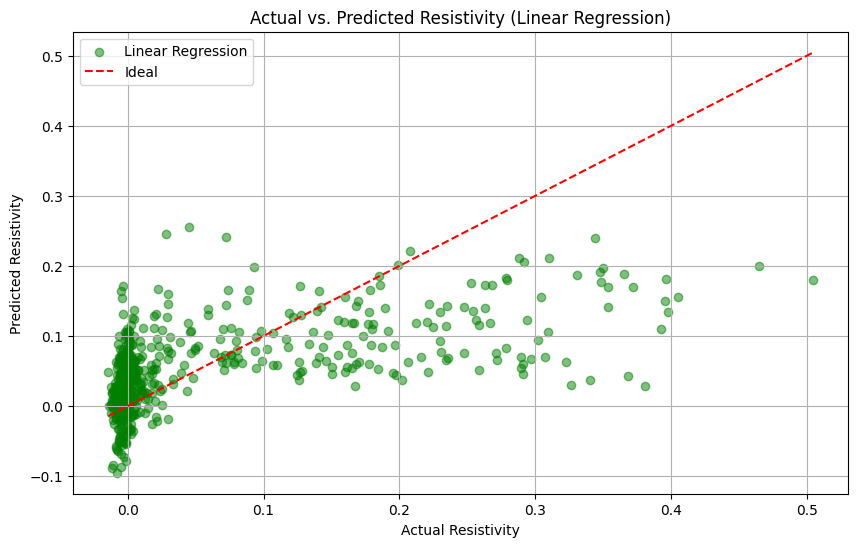

In [40]:
# Linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Prediction
lr_y_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_y_pred)
print(f'Mean Squared Error (Linear Regression): {lr_mse:.4f}')

# comparison Between actual and predicted values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_y_pred, alpha=0.5, color='green', label='Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal')
plt.xlabel('Actual Resistivity')
plt.ylabel('Predicted Resistivity')
plt.title('Actual vs. Predicted Resistivity (Linear Regression)')
plt.grid()
plt.legend()
plt.show()